In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier


from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("/content/teleCust1000t.csv")

In [ ]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [ ]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [ ]:
df["custcat"].nunique()

4

In [ ]:
df["custcat"].unique()

array([1, 4, 3, 2])

In [ ]:
df["custcat"].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


In [ ]:
X = df.drop(['custcat'], axis = 1)

y = df['custcat']

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))# this line is used for scalling process
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) ### it is used to split data some data to the training and some data to the testing
k = 4

KNN_classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)


Pred_y = KNN_classifier.predict(X_test)

print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))




Accuracy of model at K=4 is 0.32


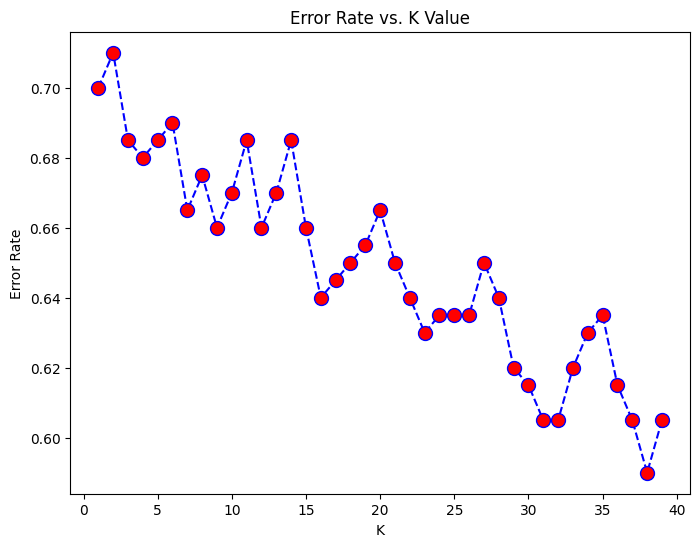

In [ ]:
error_rate = []


for i in range(1,40):

 knn = KNeighborsClassifier(n_neighbors=i)

 knn.fit(X_train,y_train)

 pred_i = knn.predict(X_test)

 error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(8,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Minimum error:- 0.59 at K = 37


In [ ]:
###train Model and Predict
k = 37
KNN_classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = KNN_classifier.predict(X_test)
print("Accuracy of model at K=37 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=37 is 0.395
